In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colormaps as cm

In [2]:
points = np.array([[-3, 0], 
                   [ 3, 0], 
                   [ 0, 4]])

In [3]:
radiuses = [1, 2.5, 3, 3.125]

In [4]:
n = len(radiuses)

In [5]:
edges_c = [[], 
           [(0, 2), (1, 2)], 
           [(0, 1), (0, 2), (1, 2)], 
           [(0, 1), (0, 2), (1, 2)]]
edges_r = [[], 
           [(0, 2), (1, 2)], 
           [(0, 1), (0, 2), (1, 2)], 
           [(0, 1), (0, 2), (1, 2)]]

In [6]:
simplicex_c = np.arange(4) >= 3
simplicex_r = np.arange(4) >= 2

In [7]:
hom0_u = ['\mathbb{Z}^3', '\mathbb{Z}^1', '\mathbb{Z}^1', '\mathbb{Z}^1']
hom0_c = ['\mathbb{Z}^3', '\mathbb{Z}^1', '\mathbb{Z}^1', '\mathbb{Z}^1']
hom0_r = ['\mathbb{Z}^3', '\mathbb{Z}^1', '\mathbb{Z}^1', '\mathbb{Z}^1']

hom1_u = ['0', '0', '\mathbb{Z}^1', '0']
hom1_c = ['0', '0', '\mathbb{Z}^1', '0']
hom1_r = ['0', '0', '0', '0']

homs_u = np.array([hom0_u, hom1_u]).transpose()
homs_c = np.array([hom0_c, hom1_c]).transpose()
homs_r = np.array([hom0_r, hom1_r]).transpose()

In [20]:
titles_up_u = ['$X_{index} = U_{radius}(p)$'.replace('index', str(i)).replace('radius', str(radiuses[i])) for i in range(n)]
titles_up_c = ['$X_{index} = C_{radius}(p)$'.replace('index', str(i)).replace('radius', str(radiuses[i])) for i in range(n)]
titles_up_r = ['$X_{index} = R_{radius}(p)$'.replace('index', str(i)).replace('radius', str(radiuses[i])) for i in range(n)]

titles_dn_u = ['$H_0 = {0}; \; H_1 = {1}$'.format(i[0], i[1]) for i in homs_u]
titles_dn_c = ['$H_0 = {0}; \; H_1 = {1}$'.format(i[0], i[1]) for i in homs_c]
titles_dn_r = ['$H_0 = {0}; \; H_1 = {1}$'.format(i[0], i[1]) for i in homs_r]

In [21]:
filename = 'LaTeX/pics/filtration{0}.png'

In [22]:
figsize = (15, 4)

In [23]:
xticks_u = np.arange(-6, 7, 3)
yticks_u = np.arange(-2, 7, 2)

xticks_c = np.arange(-3, 4, 3)
yticks_c = np.arange( 0, 5, 2)

xticks_r = np.arange(-3, 4, 3)
yticks_r = np.arange( 0, 5, 2)

In [24]:
frame_u = np.array([(-6, -2), (6, -2), (6, 6)])
frame_c = np.array([(-4, -1), (4, -1), (4, 5)])
frame_r = np.array([(-4, -1), (4, -1), (4, 5)])

# Union

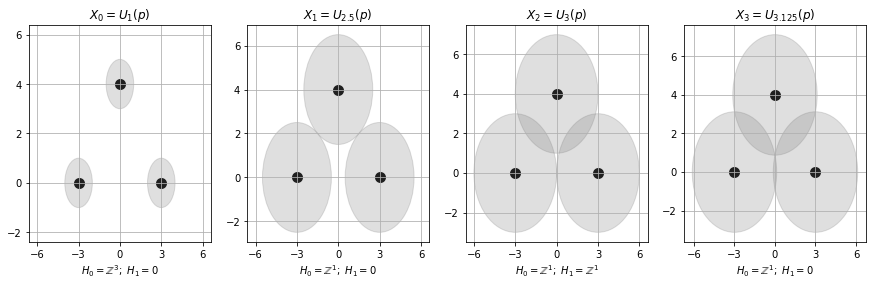

In [25]:
fig, axs = plt.subplots(1, n, figsize=figsize)

for i in range(n):
    axs[i].scatter(points[:, 0], points[:, 1], color='black', linewidth=5)
    for point in points:
        circle = patches.Circle(point, radius=radiuses[i], color='grey', alpha=0.25)
        axs[i].add_patch(circle)
    axs[i].plot(frame_u[:, 0], frame_u[:, 1], alpha=0)
    axs[i].set_xticks(xticks_u)
    axs[i].set_yticks(yticks_u)
    axs[i].set_title(titles_up_u[i])
    axs[i].set_xlabel(titles_dn_u[i])
    axs[i].grid(True)

fig.savefig(filename.format('U'))

# Cech

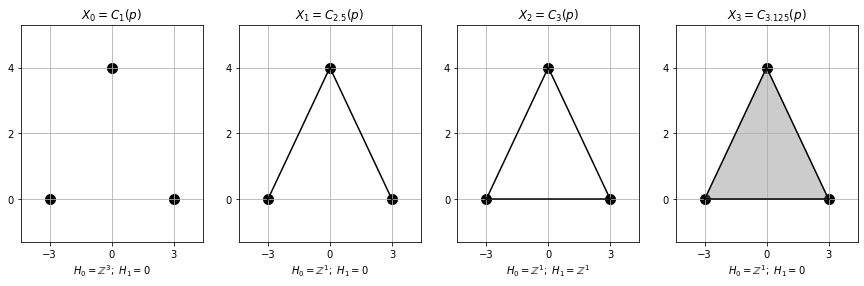

In [26]:
fig, axs = plt.subplots(1, n, figsize=figsize)

for i in range(n):
    axs[i].scatter(points[:, 0], points[:, 1], color='black', linewidth=5)
    for edge in edges_c[i]:
        p0 = points[edge[0]]
        p1 = points[edge[1]]
        axs[i].plot([p0[0], p1[0]], [p0[1], p1[1]], color='black')
    if simplicex_c[i]:
        axs[i].fill(points[:, 0], points[:, 1], color='grey', alpha=0.4)
    
    axs[i].plot(frame_c[:, 0], frame_c[:, 1], alpha=0)
    axs[i].set_xticks(xticks_c)
    axs[i].set_yticks(yticks_c)
    axs[i].set_title(titles_up_c[i])
    axs[i].set_xlabel(titles_dn_c[i])
    axs[i].grid(True)

fig.savefig(filename.format('C'))

# Rips

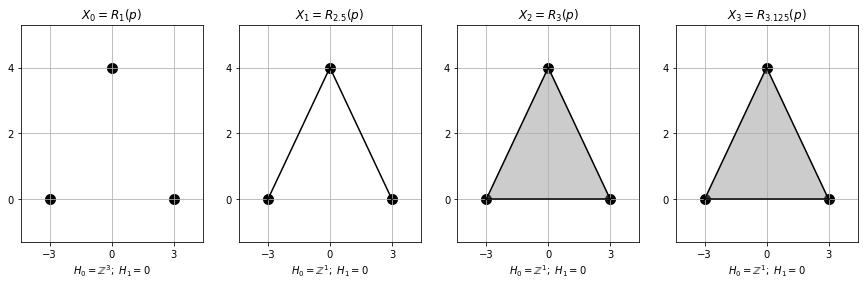

In [27]:
fig, axs = plt.subplots(1, n, figsize=figsize)

for i in range(n):
    axs[i].scatter(points[:, 0], points[:, 1], color='black', linewidth=5)
    for edge in edges_r[i]:
        p0 = points[edge[0]]
        p1 = points[edge[1]]
        axs[i].plot([p0[0], p1[0]], [p0[1], p1[1]], color='black')
    if simplicex_r[i]:
        axs[i].fill(points[:, 0], points[:, 1], color='grey', alpha=0.4)
    
    axs[i].plot(frame_r[:, 0], frame_r[:, 1], alpha=0)
    axs[i].set_xticks(xticks_r)
    axs[i].set_yticks(yticks_r)
    axs[i].set_title(titles_up_r[i])
    axs[i].set_xlabel(titles_dn_r[i])
    axs[i].grid(True)

fig.savefig(filename.format('R'))